In [164]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# need to use a gamma function later on, so import math

import math

%matplotlib inline

df = pd.read_csv(r'C:\Users\Latitude\Documents\Coursera\Wind Resource\Proj' \
                 'ect\Wind_Lidar_40and140.txt',
                sep=' ',
                header=None,
                names=['Year','Month','Day','Hour','v_40','v_140'])

In [153]:
df['v_40_cubed'] = df['v_40']**3
df['v_140_cubed'] = df['v_140']**3

In [154]:
df.head()

Year  Month  Day     Hour  v_40  v_140  v_40_cubed  v_140_cubed
0  2014      8    1  0.00000  3.63   5.10   47.832147   132.651000
1  2014      8    1  0.16667  3.46   5.16   41.421736   137.388096
2  2014      8    1  0.33333  3.57   5.98   45.499293   213.847192
3  2014      8    1  0.50000  3.46   5.58   41.421736   173.741112
4  2014      8    1  0.66667  3.57   4.81   45.499293   111.284641

In [155]:
v_40_bar = df['v_40'].mean()
v_40_cubed_bar = df['v_40_cubed'].mean()
v_40_bar_cubed = v_40_bar ** 3

# energy pattern factor = epf

epf = v_40_cubed_bar / v_40_bar_cubed

# shape factor = k

k_40 = 1 + 3.69/epf**2

# scale parameter = c
# use imported math library to use gamma function math.gamma

c_40 = v_40_bar / math.gamma(1+1/k_40)

print(v_40_bar)
print(v_40_cubed_bar)
print(v_40_bar_cubed)
print (epf)
print(k_40)
print(c_40)

4.584789061797247
160.5229011033552
96.37359906594021
1.665631486829947
2.330051698138921
5.174359511210226


In [156]:
bins_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
freq_df = df.apply(pd.Series.value_counts, bins=bins_1)
freq_df

Year  Month   Day  Hour  v_40  v_140  v_40_cubed  v_140_cubed
(-0.001, 1.0]   NaN   2857  1129  1675   246    153         246          153
(1.0, 2.0]      NaN   3669  1308  1423  2089   1038         267          136
(2.0, 3.0]      NaN   4069  1132  1409  5125   1942         305          175
(3.0, 4.0]      NaN   2610  1236  1415  7490   2728         292          160
(4.0, 5.0]      NaN      0  1171  1410  6593   3560         295          137
(5.0, 6.0]      NaN   2179  1174  1359  4429   4392         303          144
(6.0, 7.0]      NaN   1727  1191  1374  3011   4579         320          155
(7.0, 8.0]      NaN   3297  1230  1415  2087   4284         307          131
(8.0, 9.0]      NaN   3563  1215  1454  1239   3310         293          119
(9.0, 10.0]     NaN   3267  1114  1457   613   2664         256           99
(10.0, 11.0]    NaN   2787  1171  1450   249   1925         273          116
(11.0, 12.0]    NaN   3326  1132  1463    90   1270         257           93
(12.0, 13.0]    NaN      0  1118  1436    50    695         324          111
(13.0, 14.0]    NaN      0   784  1425    24    414         261          107
(14.0, 15.0]    NaN      0  1031  1368    13    222         257           77
(15.0, 16.0]    NaN      0  1194  1345     3    117         223          119

In [157]:
bins_1 = np.linspace(0,16,65,endpoint=True)
freq_df = df.apply(pd.Series.value_counts, bins=bins_1)
freq_df

Year  Month   Day  Hour  v_40  v_140  v_40_cubed  v_140_cubed
(-0.001, 0.25]   NaN      0     0   485     1      5          61           54
(0.25, 0.5]      NaN      0     0   476    26     28          71           31
(0.5, 0.75]      NaN      0     0   240    87     46          57           33
(0.75, 1.0]      NaN   2857  1129   474   132     74          57           35
(1.0, 1.25]      NaN      0     0   234   267    136          69           33
...              ...    ...   ...   ...   ...    ...         ...          ...
(14.75, 15.0]    NaN      0  1031   450     1     42          58           22
(15.0, 15.25]    NaN      0     0   227     1     36          33           30
(15.25, 15.5]    NaN      0     0   461     1     30         101           48
(15.5, 15.75]    NaN      0     0   224     0     27          50           21
(15.75, 16.0]    NaN      0  1194   433     1     24          39           20

[64 rows x 8 columns]

In [158]:
freq_df_tidy = freq_df.drop(['Year','Month','Day','Hour','v_40_cubed','v_140_cubed'], axis=1)
freq_df_tidy['v_40_%time'] = freq_df_tidy['v_40']/freq_df_tidy['v_40'].sum()
freq_df_tidy

v_40  v_140  v_40_%time
(-0.001, 0.25]     1      5    0.000030
(0.25, 0.5]       26     28    0.000780
(0.5, 0.75]       87     46    0.002609
(0.75, 1.0]      132     74    0.003958
(1.0, 1.25]      267    136    0.008006
...              ...    ...         ...
(14.75, 15.0]      1     42    0.000030
(15.0, 15.25]      1     36    0.000030
(15.25, 15.5]      1     30    0.000030
(15.5, 15.75]      0     27    0.000000
(15.75, 16.0]      1     24    0.000030

[64 rows x 3 columns]

<AxesSubplot:>

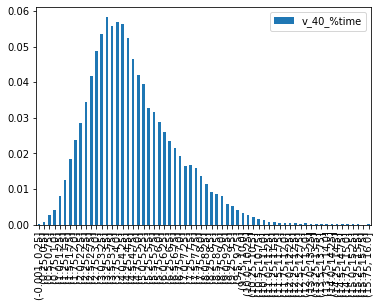

In [159]:
freq_df_tidy.plot.bar(y='v_40_%time')

<BarContainer object of 64 artists>

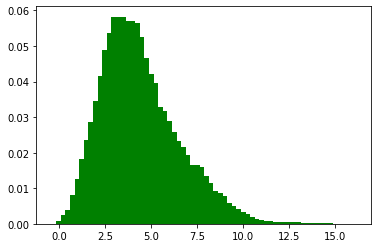

In [185]:
plt.bar(x, freq_df_tidy['v_40_%time'], color="green")

In [160]:
freq_df_tidy['windspeed_bin'] = np.linspace(0,16,64,endpoint=False)
freq_df_tidy

v_40  v_140  v_40_%time  windspeed_bin
(-0.001, 0.25]     1      5    0.000030           0.00
(0.25, 0.5]       26     28    0.000780           0.25
(0.5, 0.75]       87     46    0.002609           0.50
(0.75, 1.0]      132     74    0.003958           0.75
(1.0, 1.25]      267    136    0.008006           1.00
...              ...    ...         ...            ...
(14.75, 15.0]      1     42    0.000030          14.75
(15.0, 15.25]      1     36    0.000030          15.00
(15.25, 15.5]      1     30    0.000030          15.25
(15.5, 15.75]      0     27    0.000000          15.50
(15.75, 16.0]      1     24    0.000030          15.75

[64 rows x 4 columns]

<BarContainer object of 64 artists>

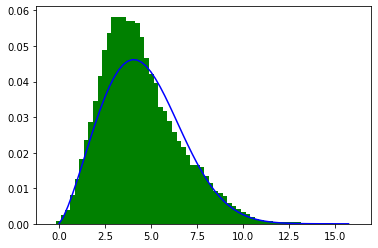

In [182]:
x = np.linspace(0,16,64,endpoint=False)
weibull = weibull_min.pdf(x, k_40, loc=0, scale=c_40)/4
plt.plot(x, weibull, color="blue")
plt.bar(x, freq_df_tidy['v_40_%time'], color="green")

In [193]:
freq_df_tidy['Weibull_40'] = weibull_min.pdf(freq_df_tidy['windspeed_bin'], k_40, loc=0, scale=c_40)/4
freq_df_tidy['Wind_Power_Density_40'] = 0.5 * 1.225 * freq_df_tidy['Weibull_40'] * freq_df_tidy['windspeed_bin']**3

In [194]:
freq_df_tidy

v_40  v_140  v_40_%time  windspeed_bin  Wind_Power_Density_40  \
(-0.001, 0.25]     1      5    0.000030           0.00               0.000000   
(0.25, 0.5]       26     28    0.000780           0.25               0.000019   
(0.5, 0.75]       87     46    0.002609           0.50               0.000383   
(0.75, 1.0]      132     74    0.003958           0.75               0.002204   
(1.0, 1.25]      267    136    0.008006           1.00               0.007580   
...              ...    ...         ...            ...                    ...   
(14.75, 15.0]      1     42    0.000030          14.75               0.009191   
(15.0, 15.25]      1     36    0.000030          15.00               0.006249   
(15.25, 15.5]      1     30    0.000030          15.25               0.004200   
(15.5, 15.75]      0     27    0.000000          15.50               0.002791   
(15.75, 16.0]      1     24    0.000030          15.75               0.001833   

                  Weibull_40  
(-0.001, 0.25]  0.000000e+00  
(0.25, 0.5]     1.999120e-03  
(0.5, 0.75]     5.008667e-03  
(0.75, 1.0]     8.530696e-03  
(1.0, 1.25]     1.237525e-02  
...                      ...  
(14.75, 15.0]   4.676319e-06  
(15.0, 15.25]   3.023114e-06  
(15.25, 15.5]   1.933660e-06  
(15.5, 15.75]   1.223664e-06  
(15.75, 16.0]   7.660917e-07  

[64 rows x 6 columns]

In [196]:
freq_df_tidy['Wind_Power_Density_40'].sum()

98.26362656835008

In [204]:
df['Wind_Power_Density_40'] = 0.5 * 1.225 * df['v_40']**3
df['Wind_Power_Density_40'].mean()

98.32027692580509

In [205]:
from scipy.optimize import newton

In [ ]:
def(x,y,z)

In [47]:
# v_40_cubed = df[df.loc['v_40']**3].mean()
# v_40_cubes_bar = df['v_40_cubed'].mean()
# df['v_40']**3]
# df.loc[df['v_40'] ** 3].mean()

# v40_cubed_bar = np.mean(df['v_40']**3)
# v_40_cubed_bar
# df.loc[df['v_40'] <= 1]

0         47.832147
1         41.421736
2         45.499293
3         41.421736
4         45.499293
            ...    
33346     49.430863
33347     64.000000
33348    101.194696
33349    149.721291
33350     99.897344
Name: v_40, Length: 33351, dtype: float64

In [90]:
# df['v_40'].min()

0.2

In [ ]:
# bins_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
# df['v_40'].value_counts(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])